### <font color = purple>Problem Statement:

<font color = blue> **Avocado is a fruit consumed by people heavily in the United States.** 

**Content :**
    
**This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.** 

**The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.** 

**Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.** 

**The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.**

**Some relevant columns in the dataset:**

**Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold**

**Inspiration /Label**

**Your task is to make a mode that can consider the data provided and predict the Average Price.**

### <font color = purple>Importing Required Library

In [45]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

### <font color = purple>Reading Data

In [2]:
df = pd.read_csv(r"C:\Users\Kushal Arya\Desktop\csv file\avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### <font color = purple>Check no of row and column

In [3]:
print('No of Rows and Columns ----->', df.shape )

No of Rows and Columns -----> (18249, 14)


### <font color = purple>Checking for Null values

In [4]:
print('----------------------\n')
print(df.isnull().sum())
print('\n----------------------')

----------------------

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

----------------------


#### <font color = blue>There is no null value

### <font color = purple> Information about dataset

In [5]:
print('----------------------------------------------------\n')
print(df.info())
print('\n----------------------------------------------------')

----------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None

----------------------------------------------------


#### <font color = blue>Categorical data present in our data set

### <font color = purple>Statistics of Data 

In [6]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


#### <font color = blue>Outliers are present in data

## <font color = purple>Features engineering

### <font color = purple>Add Months Column

In [7]:
df['Months'] = df['Date'].str[5:7]
df['Months'] = df['Months'].astype('int32')
df.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Months
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12


####  <font color = blue>Month column added and  convert into int32

In [8]:
print('----------------------------------------------------\n')
print(df.info())
print('\n----------------------------------------------------')

----------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
 14  Months        18249 non-null  int32  
dtypes: float64(9), int32(1), int64(2), object(3)
memory usage: 2.0+ MB
None

----------------------------

#### <font color = blue>Months column is converted into int32

### <font color = purple>Add Sales column

In [9]:
df['Sales']= df['Total Volume'] * df['AveragePrice']
df.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Months,Sales
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,85434.7046
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,74083.9230


#### <font color = blue>Sales column added in our dataset

### <font color = purple> To know highest month for sales

In [10]:
s = df.groupby('Months')['Sales'].sum()
s

Months
1     1.771539e+09
2     1.648614e+09
3     1.730009e+09
4     1.327835e+09
5     1.515673e+09
6     1.312736e+09
7     1.529586e+09
8     1.343889e+09
9     1.207088e+09
10    1.342014e+09
11    1.097177e+09
12    1.107970e+09
Name: Sales, dtype: float64

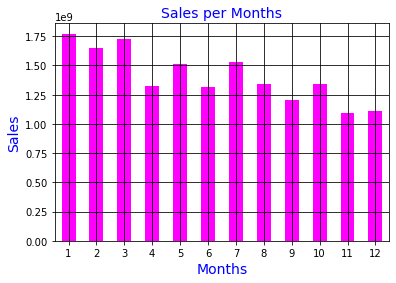

In [11]:
s.plot.bar(x = 'Months', y = 'Sales', rot = 360,color = 'magenta')
plt.grid(c = 'black')
plt.ylabel('Sales',fontsize = 14, color = 'b')
plt.xlabel('Months',fontsize = 14, color = 'b')
plt.title('Sales per Months',fontsize = 14, color = 'b')
plt.show()

#### <font color = blue>January is best month for sales 

### <font color = purple>To know highest year of sales

In [12]:
y = df.groupby('year')['Sales'].sum().sort_values()
y

year
2018    1.482343e+09
2015    4.488448e+09
2016    4.997590e+09
2017    5.965750e+09
Name: Sales, dtype: float64

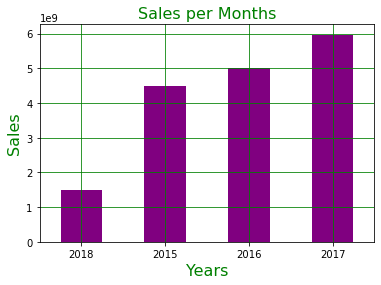

In [13]:
y.plot.bar(x = 'year', y = 'Sales', rot = 360,color = 'purple')
plt.grid(c = 'g')
plt.ylabel('Sales',fontsize = 16, color = 'g')
plt.xlabel('Years',fontsize = 16, color = 'g')
plt.title('Sales per Months',fontsize = 16, color = 'g')
plt.show()

#### <font color = blue>In 2017 highest sales are done

In [14]:
df['XLarge Bags'].value_counts()

0.00        12048
3.33           29
6.67           16
1.11           15
5.00           12
            ...  
9.95            1
3.47            1
59.32           1
16090.51        1
4920.17         1
Name: XLarge Bags, Length: 5588, dtype: int64

#### <font color = blue>Above we check 'XLarge Bags' column we have doubt it is zero value but it is not 

### <font color = purple>To know which type of avacado  highest sales

In [15]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [16]:
t = df.groupby('type')['Sales'].sum()
t

type
conventional    1.625352e+10
organic         6.806085e+08
Name: Sales, dtype: float64

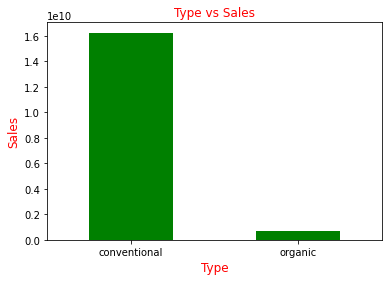

In [17]:
t.plot.bar(x = 'type', y = 'Sales', rot = 360, color = 'g')
plt.ylabel('Sales',fontsize = 12, color = 'r')
plt.xlabel('Type',fontsize = 12, color = 'r')
plt.title('Type vs Sales',fontsize = 12, color = 'r')
plt.show()

#### <font color = blue>Conventional type has highest sales

### <font color = purple>To know which region has highest sales

In [18]:
r = df.groupby('region')['Sales'].sum().sort_values()
r

region
Syracuse               1.520519e+07
Boise                  1.534667e+07
Spokane                1.715649e+07
Louisville             1.749555e+07
Albany                 2.176672e+07
Pittsburgh             2.319481e+07
Roanoke                2.740928e+07
BuffaloRochester       3.154509e+07
Columbus               3.156295e+07
Jacksonville           3.348396e+07
Indianapolis           3.402474e+07
Nashville              3.572664e+07
StLouis                3.743946e+07
GrandRapids            3.785124e+07
CincinnatiDayton       4.498958e+07
Charlotte              4.574304e+07
RichmondNorfolk        4.734482e+07
NewOrleansMobile       4.867626e+07
HarrisburgScranton     5.295472e+07
LasVegas               5.480905e+07
RaleighGreensboro      5.983780e+07
Detroit                6.912624e+07
SouthCarolina          6.952808e+07
Orlando                6.961121e+07
HartfordSpringfield    7.118645e+07
Tampa                  7.695906e+07
NorthernNewEngland     8.962525e+07
SanDiego             

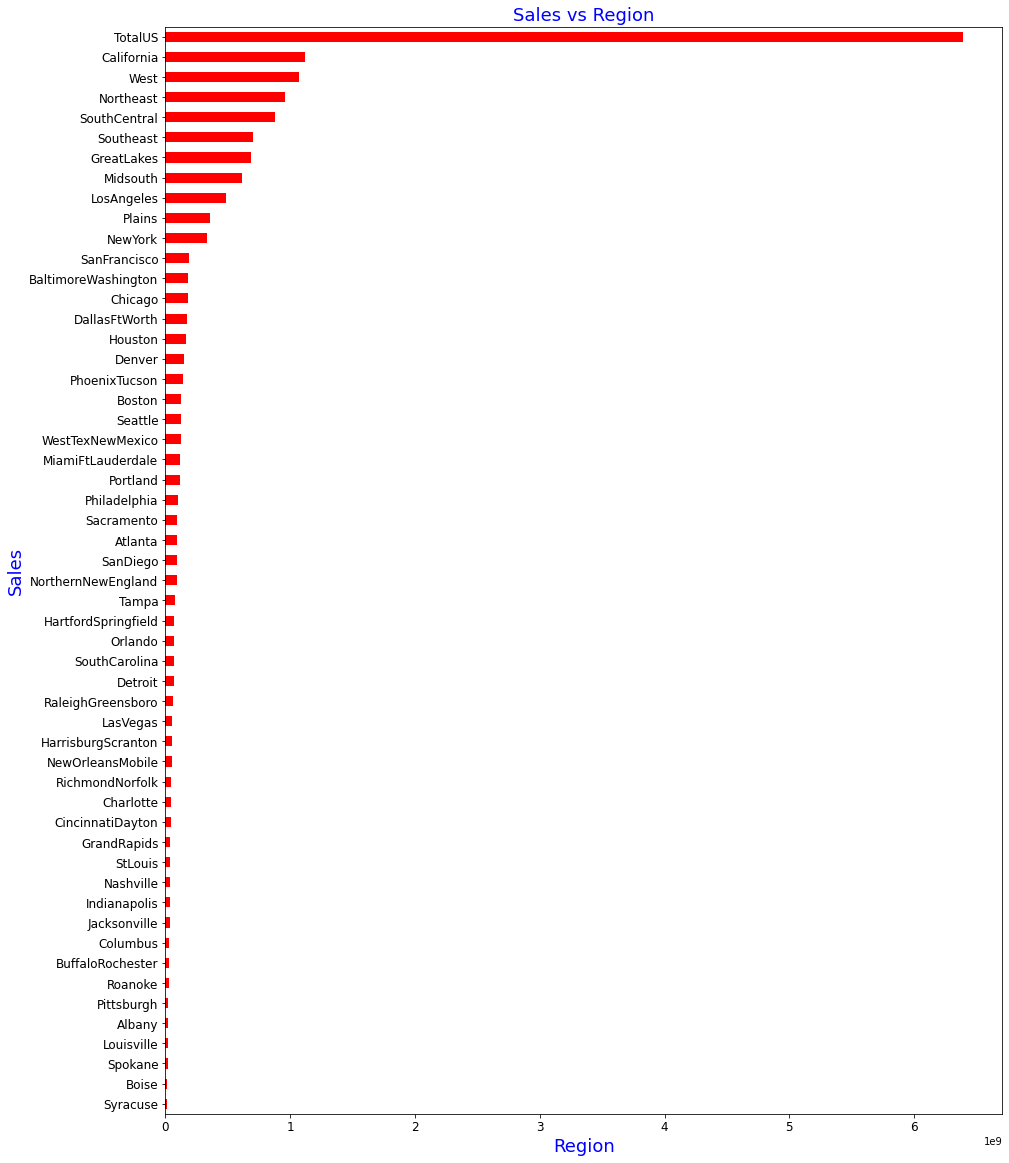

In [19]:
r.plot.barh(x = 'region', y = 'Sales', rot = 360, figsize = (15,20), color = 'r',fontsize = 12)
plt.ylabel('Sales',fontsize = 18, color = 'b')
plt.xlabel('Region',fontsize = 18, color = 'b')
plt.title('Sales vs Region', fontsize = 18, color = 'b')
plt.show()

#### <font color = blue>US region has highest sales

### <font color = purple>Label Encoder

In [20]:
le = LabelEncoder()

In [21]:
df['type'] = le.fit_transform(df['type'])

In [22]:
df['region'] = le.fit_transform(df['region'])

In [23]:
df.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Months,Sales
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,85434.7046
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,74083.9230


In [24]:
print('----------------------------------------------------\n')
print(df.info())
print('\n----------------------------------------------------')

----------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  int32  
 12  year          18249 non-null  int64  
 13  region        18249 non-null  int32  
 14  Months        18249 non-null  int32  
 15  Sales         18249 non-null  float64
dtypes: float64(10), int32(3), int64(2), object(1)
memory usage

#### <font color = blue>Columns are encoded

### <font color = purple>Delete Unwanted Columns

In [25]:
col = ['Unnamed: 0', 'Date']

In [26]:
df = df.drop(col, axis = 1)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Months,Sales
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,85434.7046
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,74083.9230
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,109944.8046
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,85311.5220
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,65330.6880


In [27]:
print('No of Rows and Columns ----->', df.shape )

No of Rows and Columns -----> (18249, 14)


#### <font color = blue>Columns has been deleted

### <font color = purple>Data distribution and checking outliers

---------------------
Distribution Plot :- 
---------------------


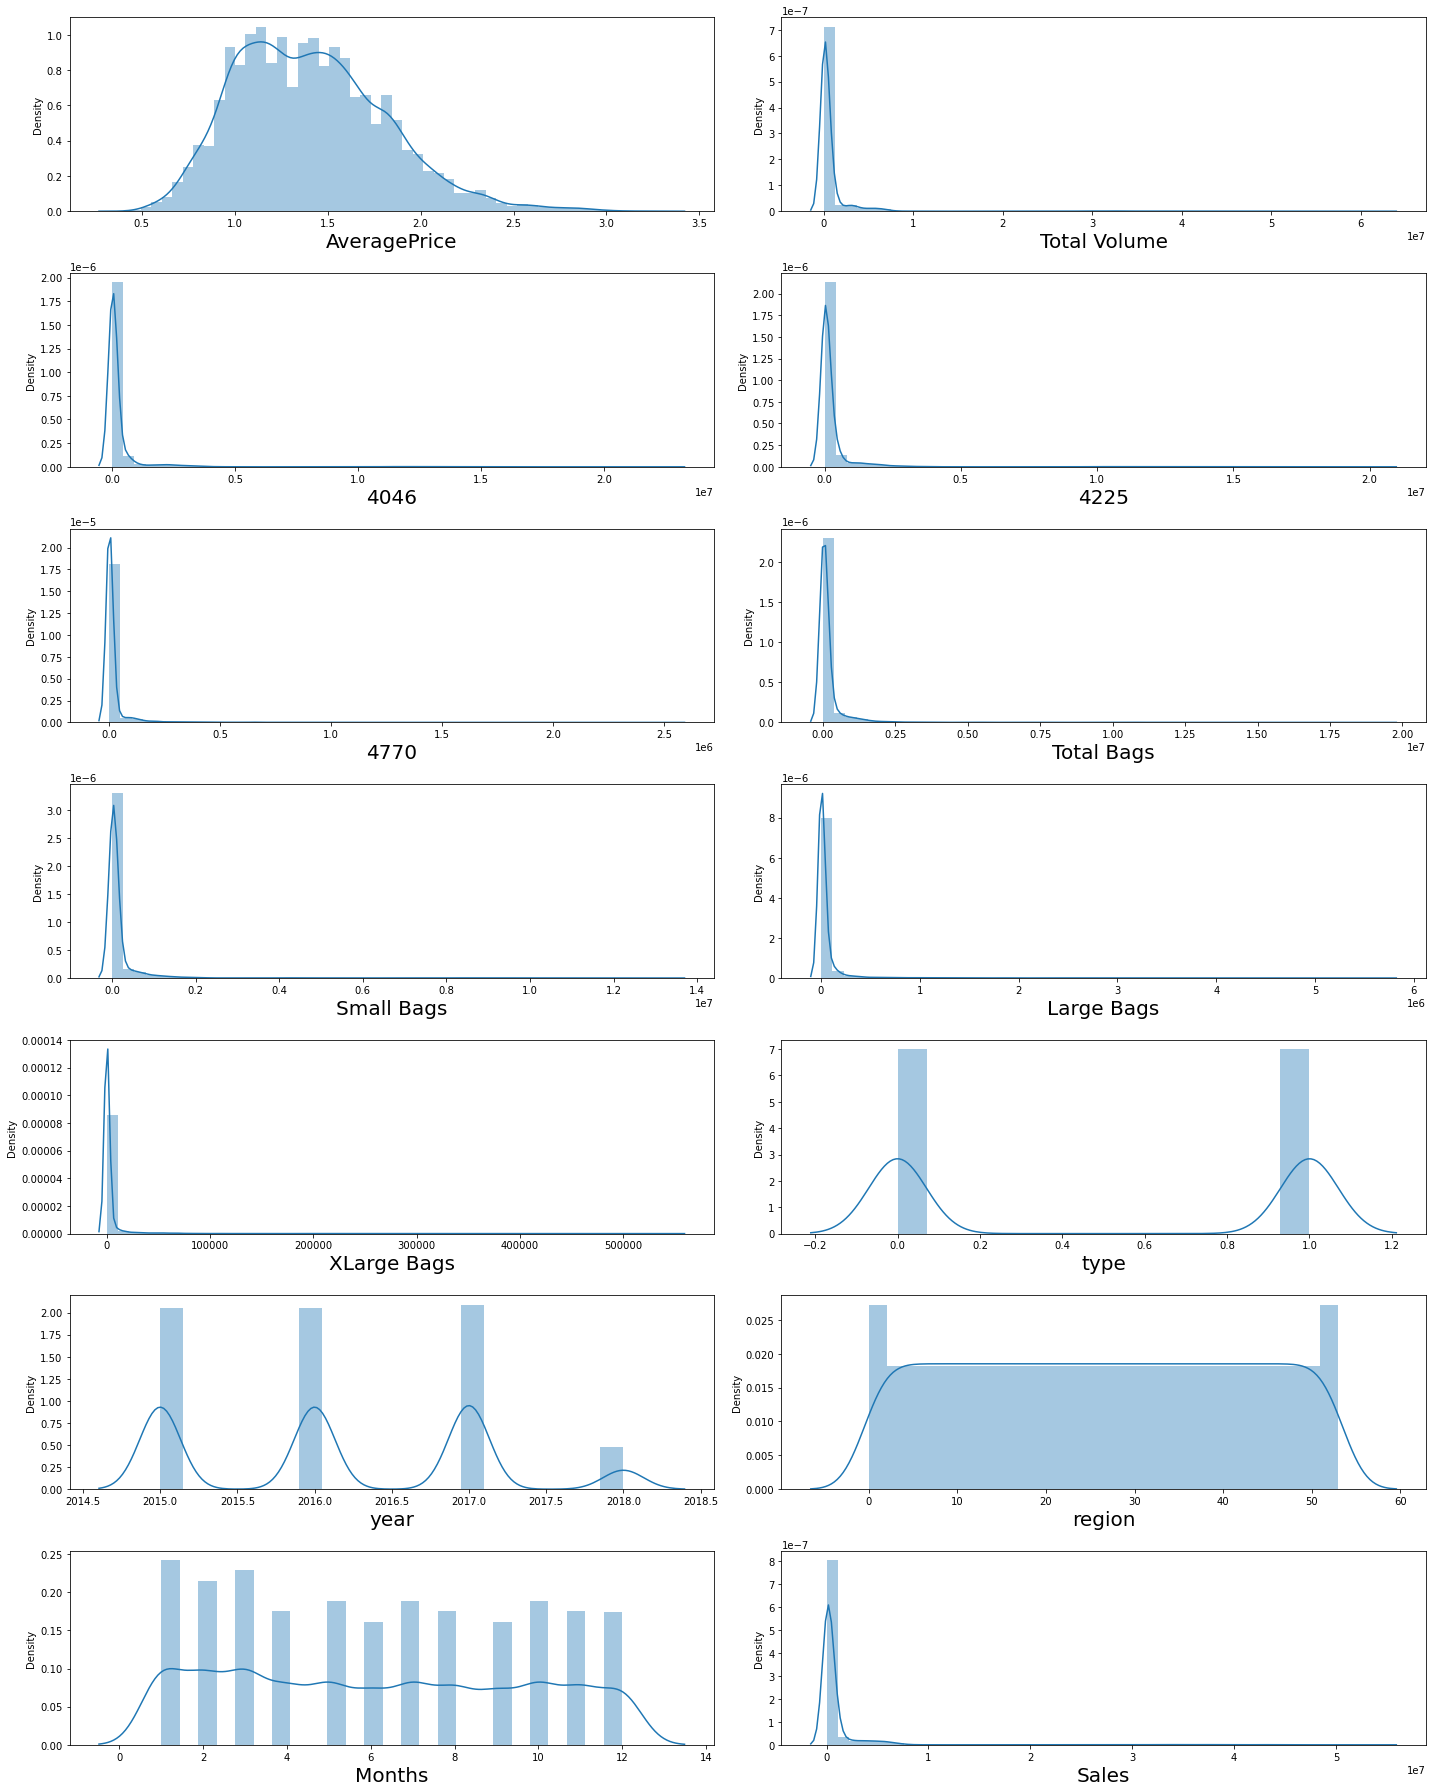

In [28]:
print('---------------------')
print('Distribution Plot :- ')
print('---------------------')
      
plt.figure(figsize = (20,25))
plotnumber = 1

for column in df:
    if plotnumber <=14:
        ax = plt.subplot(7,2, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

In [29]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Months           0.106617
Sales            8.915413
dtype: float64

#### <font color = blue>Data has outliers and skewed

### <font color = purple>Corelation of Feature vs Label using Heat map

-----------
Heat Map :-
-----------


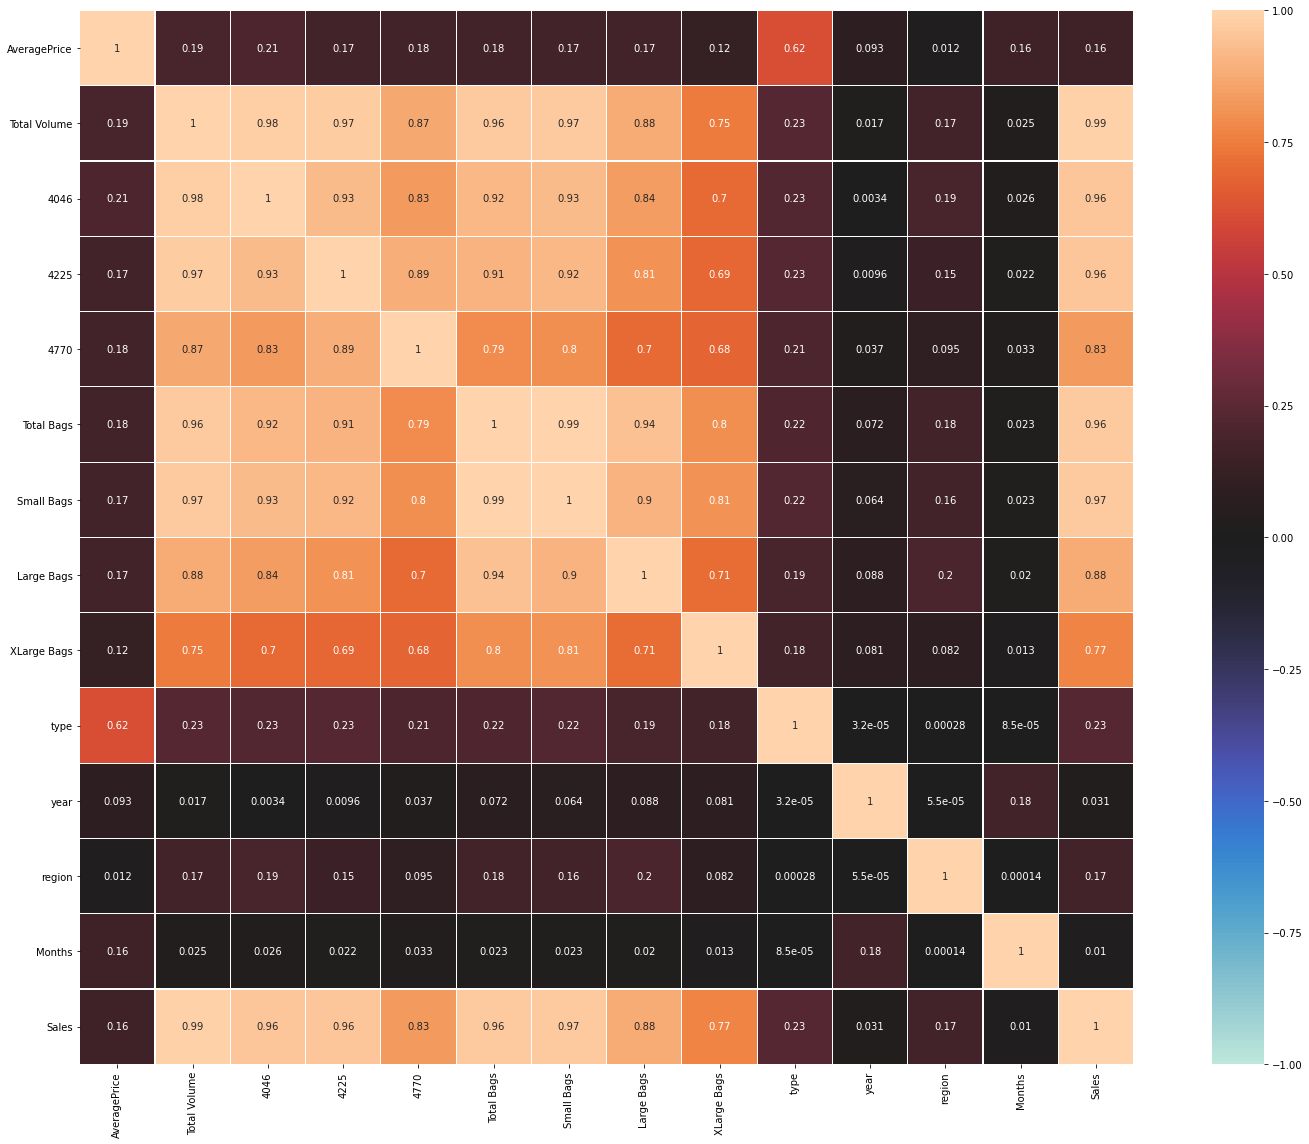

In [30]:
print('-----------')
print('Heat Map :-')
print('-----------')
df_corr = df.corr().abs()

plt.figure(figsize = (22,16))
sns.heatmap(df_corr, vmin = -1, annot = True, square = True, center = 0, fmt = '.2g', linewidths = .1)
plt.tight_layout()

#### <font color = blue>Total Volume has highest and months has lowest relation with label

### <font color = purple>Checking class imbalence

In [31]:
df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
2.91      1
2.68      1
3.04      1
3.17      1
3.03      1
Name: AveragePrice, Length: 259, dtype: int64

#### <font color = blue>Class is not balanced

### <font color = purple>Quntile metthod to removing outliers and skewness.

In [32]:
# we are removing the top 2% data from the Total Volume column
q = df['Total Volume'].quantile(0.98)
data_cleaned = df[df['Total Volume']<q]
# we are removing the top 2% data from the 4046 column
q = df['4046'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['4046']<q]
# we are removing the top 2% data from the 4225 column
q = df['4225'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['4225']<q]
# we are removing the top 2% data from the 4770 column
q = df['4770'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['4770']<q]
# we are removing the top 2% data from the free Total Bags column
q = df['Total Bags'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['Total Bags']<q]
# we are removing the top 2% data from the Small Bags column
q = df['Small Bags'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['Small Bags']<q]
# we are removing the top 2% data from the Large Bags column
q = df['Large Bags'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['Large Bags']<q]
# we are removing the top 2% data from the XLarge Bags column
q = df['XLarge Bags'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['XLarge Bags']<q]
# we are removing the top 2% data from the Sales column
q = df['Sales'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['Sales']<q]

### <font color = purple>Checking Outliers and skewness removed or not


Distribution Plot :-



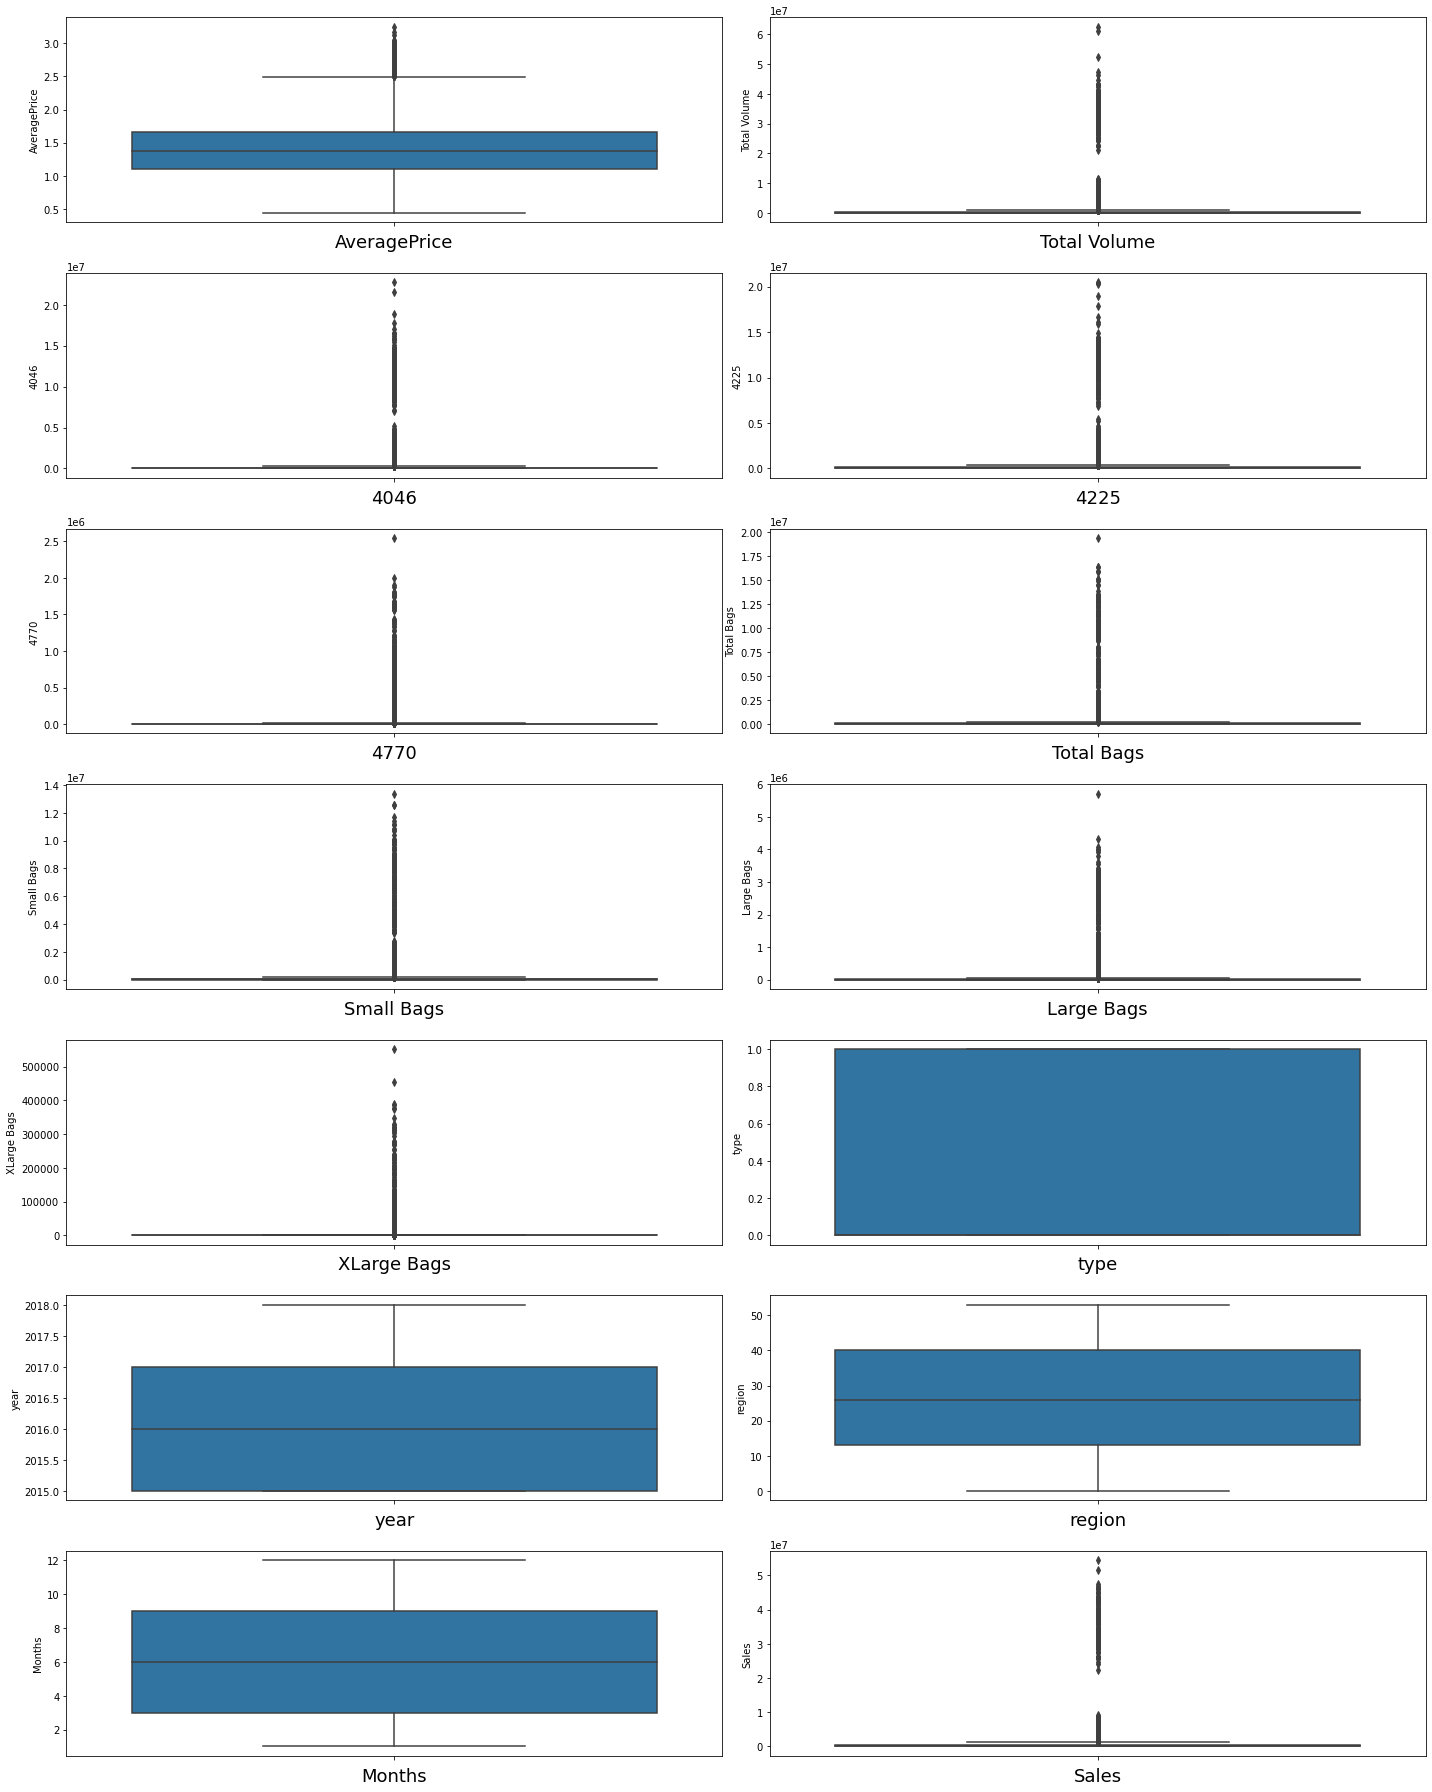

In [33]:
# Let' see outliers are removed in columns or not.
print('\nDistribution Plot :-\n')

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <=14:
        ax = plt.subplot(7,2, plotnumber)
        sns.boxplot(y=df[column]) # It is the axis for vertical set as y
        plt.xlabel(column, fontsize = 18)
    plotnumber += 1
plt.tight_layout()

#### <font color = blue>Outliers are removed

### <font color = purple>Spliting Dataset into features and labels

In [34]:
x = df.drop('AveragePrice', axis = 1)
y = df. AveragePrice
print('Data has been splited')

Data has been splited


------------------------
Distribution Plot :-
------------------------


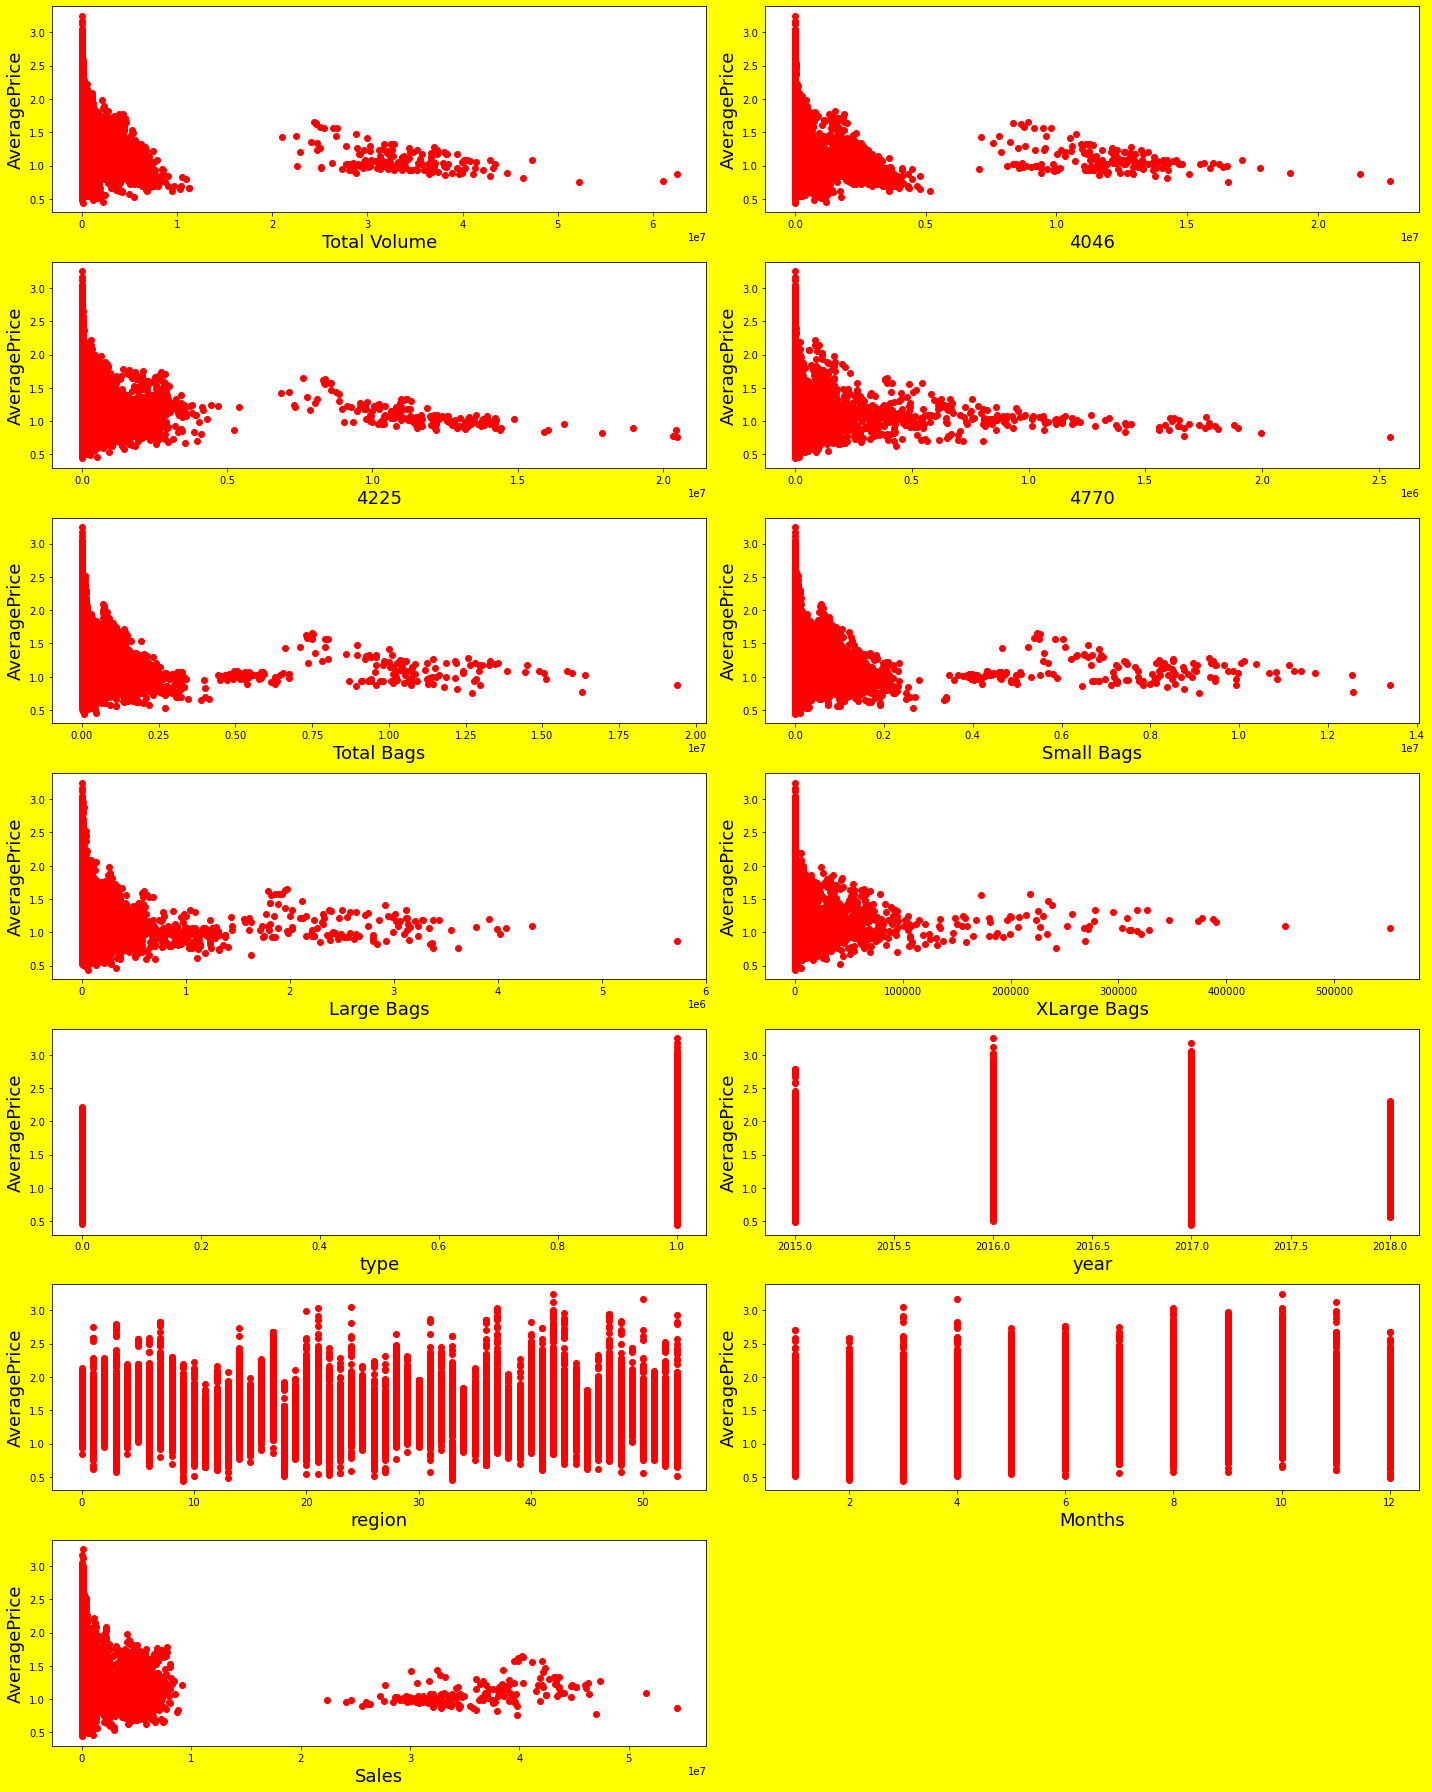

In [40]:
# Let' see relation between features and labels.
print('------------------------')
print('Distribution Plot :-')
print('------------------------')

plt.figure(figsize = (20,25), facecolor = 'yellow')
plotnumber = 1
for column in x:
    if plotnumber <=14:
        ax = plt.subplot(7,2, plotnumber)
        plt.scatter(x[column],y, c = 'r')
        plt.xlabel(column, fontsize = 18)
        plt.ylabel('AveragePrice', fontsize = 18)
    plotnumber += 1
plt.tight_layout()

#### <font color = blue>Features are related to label

### <font color = purple> Data Scaling

In [41]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.22771641, -0.23081597, -0.1999022 , ..., -1.7002522 ,
         1.64763162, -0.22857453],
       [-0.23042664, -0.23110251, -0.20805446, ..., -1.7002522 ,
         1.64763162, -0.23165401],
       [-0.21208462, -0.23100731, -0.1544779 , ..., -1.7002522 ,
         1.64763162, -0.22192493],
       ...,
       [-0.24233073, -0.2306933 , -0.24309014, ...,  1.70081131,
        -1.46495942, -0.24476871],
       [-0.24162464, -0.2304279 , -0.24265143, ...,  1.70081131,
        -1.46495942, -0.24326781],
       [-0.24125273, -0.22934712, -0.24317042, ...,  1.70081131,
        -1.46495942, -0.24406623]])

### <font color = purple>Split data into train and test. Model will be bulit on training data and tested on test data

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 355)
print('Data has been splited.')

Data has been splited.


## <font color = purple>Model Building

### <font color = purple> Logistic Regression model instantiaing, training and evaluating

In [46]:
Lr = LinearRegression()
Lr.fit(x_train, y_train)
y_pred = Lr.predict(x_test)

In [47]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', Lr.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.4528681041347923
RMSE of Model -------> 0.29939625971037953
MSE of Model -------> 0.08963812032856502
Score of test data ----> 0.4528681041347923


#### <font color = blue>Conclusion : Linear Regression model has 45% score

### <font color = purple>Knn model instantiaing, training and evaluating

In [49]:
Knn = KNeighborsRegressor()
Knn.fit(x_train, y_train)
y_pred = Knn.predict(x_test)

In [50]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', Knn.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.9642415902557608
RMSE of Model -------> 0.07654017521596569
MSE of Model -------> 0.0058583984220907295
Score of test data ----> 0.9642415902557608


#### <font color = blue>Conclusion : Knn model has 96% score


### <font color = purple>Decision Tree model instantiaing, training and evaluating

In [52]:
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)

In [53]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', DT.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.8217825605874876
RMSE of Model -------> 0.17087379053020385
MSE of Model -------> 0.029197852290159986
Score of test data ----> 0.8217825605874876


#### <font color = blue>Conclusion : Decision Tree model has 82% score

### <font color = purple>Random Forest model instantiaing, training and evaluating

In [55]:
Rn = RandomForestRegressor()
Rn.fit(x_train, y_train)
y_pred = Rn.predict(x_test)

In [56]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', Rn.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.9252366407800727
RMSE of Model -------> 0.11067378352550787
MSE of Model -------> 0.012248686359850977
Score of test data ----> 0.9252366407800727


#### <font color = blue> Conclusion : Random Forest model has 92% score

### <font color = purple>XGBoost model instantiaing, training and evaluating

In [57]:
xgb = xgb.XGBRegressor(eval_metric='mlogloss')
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

In [58]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', xgb.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.9632619783377186
RMSE of Model -------> 0.07758151153188628
MSE of Model -------> 0.006018890931572203
Score of test data ----> 0.9632619783377186


#### <font color = blue>Conclusion : XGBoost model has 96% score

### <font color = purple> Looking R2 score we found KNN has best model so we do Hyperparameter Tuning on it.

In [63]:
grid_param = {'leaf_size' : [1,3,5], 'n_neighbors': [3], 
             'p':[1,2,3,4]}

In [64]:
grid_search = GridSearchCV(estimator = Knn, param_grid = grid_param, cv = 5 , n_jobs = -1)

In [65]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'leaf_size': [1, 3, 5], 'n_neighbors': [3],
                         'p': [1, 2, 3, 4]})

In [66]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'leaf_size': 1, 'n_neighbors': 3, 'p': 3}


In [68]:
hknn = KNeighborsRegressor(leaf_size = 1, n_neighbors = 3, p = 3)
hknn.fit(x_train, y_train)
hknn.score(x_test, y_test)

0.9663003004702655

In [69]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', hknn.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.9632619783377186
RMSE of Model -------> 0.07758151153188628
MSE of Model -------> 0.006018890931572203
Score of test data ----> 0.9663003004702655


#### <font color = blue>After Hyperparameter Tuning model accuracy score increase to 96%.

### <font color = purple> Saving The Model

In [70]:
# saving the model to the Local file system
filename = 'Avacado Project.pickle'
pickle.dump(hknn, open(filename, 'wb'))

#### <font color = blue> Model has been saved.

## <font color = purple>Final Conclusion : Knn is our best model.